In [22]:
from torch.nn.modules.distance import CosineSimilarity
import torch
from torch.autograd import Variable
from layers import SinkhornDistance
import matplotlib.pyplot as plt

In [5]:
a = Variable(torch.zeros(2,10), requires_grad = True)
b = torch.zeros(a.size())
a.data[0][3:7] = 1
b.data[0][3:5] = 1
a.data[1][1:3] = 1
b.data[1][8:] = 1

In [13]:
b.shape

torch.Size([2, 10])

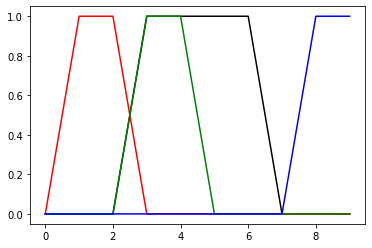

In [21]:
plt.plot(a.detach().numpy()[0], color="black")
plt.plot(a.detach().numpy()[1], color="red")
plt.plot(b.detach().numpy()[0], color="green")
plt.plot(b.detach().numpy()[1], color="blue")

In [23]:
sinkhorn = SinkhornDistance(eps=1e-5, max_iter=100, reduction=None)

In [24]:
sh_loss, P, C = sinkhorn(a,b)

In [25]:
sh_loss

tensor(3.2006, grad_fn=<SumBackward2>)

In [44]:
cosine_distance = CosineSimilarity(dim=1)

In [45]:
cosine_loss = cosine_distance(a,b)
cosine_loss

tensor([0.7071, 0.0000], grad_fn=<DivBackward0>)

In [47]:
cosine_loss[0].backward()

In [52]:
a.grad[0]

tensor([ 0.0000,  0.0000,  0.0000,  0.1768,  0.1768, -0.1768, -0.1768,  0.0000,
         0.0000,  0.0000])

In [55]:
b.grad

In [56]:
a[0]

tensor([0., 0., 0., 1., 1., 1., 1., 0., 0., 0.], grad_fn=<SelectBackward>)

In [57]:
b[0]

tensor([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

In [60]:
sh_loss.backward()

In [61]:
a.grad

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.7678e-01,  1.7678e-01,
          6.2010e-01,  6.2010e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  9.1923e+01,  9.1923e+01,  7.9641e+03,  7.9641e+03,
          0.0000e+00,  0.0000e+00,  0.0000e+00, -8.0561e+03, -8.0561e+03]])

In [63]:
a[0]

tensor([0., 0., 0., 1., 1., 1., 1., 0., 0., 0.], grad_fn=<SelectBackward>)

In [64]:
b[0]

tensor([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])